In [ ]:
# libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator
import time

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef

#Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

#Neural Network
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Lambda, Layer, ReLU
from keras.models import load_model
import tensorflow as tf
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers import BatchNormalization
import tensorflow
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Dense, Input, Reshape, Lambda, Layer, Flatten, BatchNormalization,AveragePooling2D
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist

from keras import initializers

from keras.utils import to_categorical
from keras.layers.core import Activation
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_path6 = 'Epileptic Seizure Recognition.csv'
figures_path = './figures'

In [ ]:
if not os.path.exists(figures_path):
    os.makedirs(figures_path)
if not os.path.exists(figures_path+"/6FP"):
    os.makedirs(figures_path+"/6FP")


In [ ]:
Data = pd.read_csv(data_path6)

In [ ]:
Data=Data.drop(["Unnamed"],axis=1)

In [ ]:
Labels = Data['y'].values
Features = Data.drop(['y'],axis=1).values


print('Features shape:', Features.shape)
print('Labels shape:', Labels.shape)


Features shape: (11500, 178)
Labels shape: (11500,)


In [ ]:
for i in range(len(Labels)):
  if Labels[i]==2 or Labels[i]==3 or Labels[i]==4 or Labels[i]==5:
    Labels[i]=0
  else:
    Labels[i]=1



In [ ]:
Labels

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
LabelDataFrame=pd.DataFrame(Labels)

In [ ]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        train_start_time = time.time()
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        print(f'Train runtime: {time.time()-train_start_time}')
        test_start_time = time.time()
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        print(f'Test runtime: {time.time()-test_start_time}')
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        Class_report(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CR.pdf")

#Class Prediction Error
def CPE_viz():
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CPE(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CPE.pdf")

#Confusion matrix
def CM_viz():
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        CM(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_CM.pdf")

#ROC-AUC
def ROC_viz():
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        ROC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_ROC.pdf")

#Precision Recall Curve
def PRC_viz():
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name, classifier in zip(names, classifiers):
        fig, ax = plt.subplots(nrows=1, ncols=1 )
        PRC(classifier,classes)
        #fig.savefig(figures_path+"/"+str(len(classes))+"FP/"+name+"_PRC.pdf")

In [ ]:
LabelDataFrame[0].value_counts()

0    9200
1    2300
Name: 0, dtype: int64

In [ ]:
# Write function for aggregate metrics
def classifier_metrics():
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        #model.save('modeloEpilepsia.h5')
        try:
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)

        acc_score=accuracy_score(y_test,y_pred)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('accuracy_score: {0:.4f}'.format(acc_score))
        print('cohen_kappa_score: {0:.4f}'.format(c_k_s))
        print('log_loss: {0:.4f}'.format(log_metric))
        print('zero_one_loss: {0:.4f}'.format(zero_met))
        print('hemming_loss: {0:.4f}'.format(hl))
        print('matthews_corrcoef: {0:.4f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("---------------------------------------------------------------------------------")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.2, random_state=42)

print('Train data shape:', X_train.shape)
print('Train labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Train data shape: (9200, 178)
Train labels shape: (9200,)
Test data shape: (2300, 178)
Test labels shape: (2300,)


In [ ]:
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(9200, 178)

In [ ]:
X_train.shape

(9200, 178)

In [ ]:
#classes
classes = [0, 1]

In [ ]:
# select classifiers
classifiers=[
DecisionTreeClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 2, min_samples_split= 10),#ok2
MLPClassifier(activation= 'logistic', hidden_layer_sizes=(100,), learning_rate= 'constant', solver= 'adam'), #ok2
KNeighborsClassifier(algorithm='auto', leaf_size=1, n_neighbors=1, p=2,weights='uniform'),#ok2
SGDClassifier(alpha= 0.001, loss='hinge', max_iter= 2000, penalty= 'l2'),#1
ExtraTreesClassifier( min_samples_split= 4, n_estimators= 150,random_state=20), #Definitivo2
svm.SVC(C= 10, gamma= 'scale', kernel= 'rbf'), #Definitiv
RandomForestClassifier(max_depth= None, min_samples_split= 2, n_estimators= 500, random_state=40), #Definitivo2
GradientBoostingClassifier(learning_rate=0.1, max_depth= 5, n_estimators= 200, random_state= 40), #Definitivo2
]
names=['ET', 'SVM', 'RF','GB','DCT', 'MLP', 'KN','SGD']


Train runtime: 2.3680245876312256
Test runtime: 0.04414534568786621


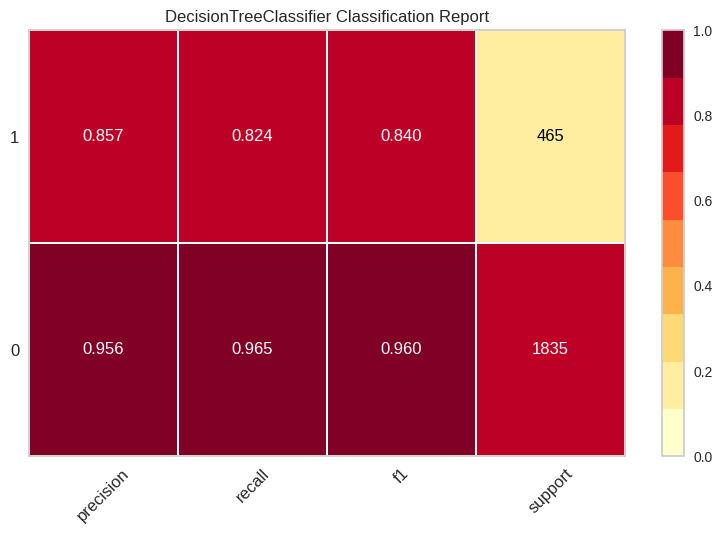

Train runtime: 16.115262031555176
Test runtime: 0.04915308952331543


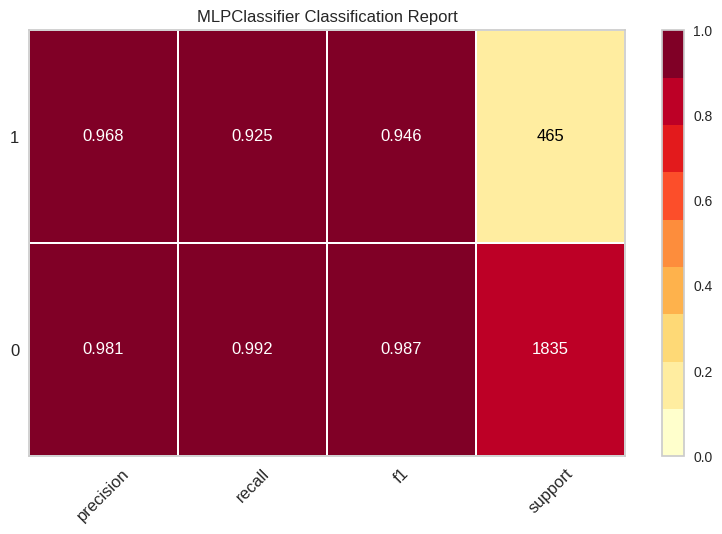

Train runtime: 0.002215147018432617
Test runtime: 0.7786288261413574


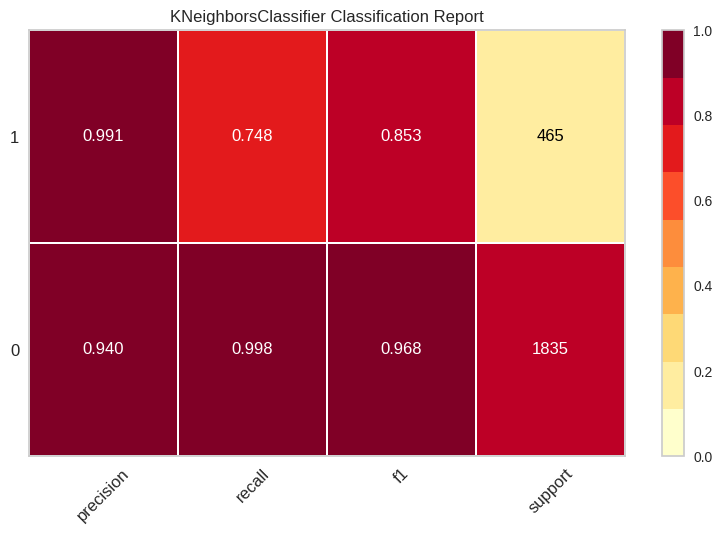

Train runtime: 0.17582106590270996
Test runtime: 0.03653216361999512


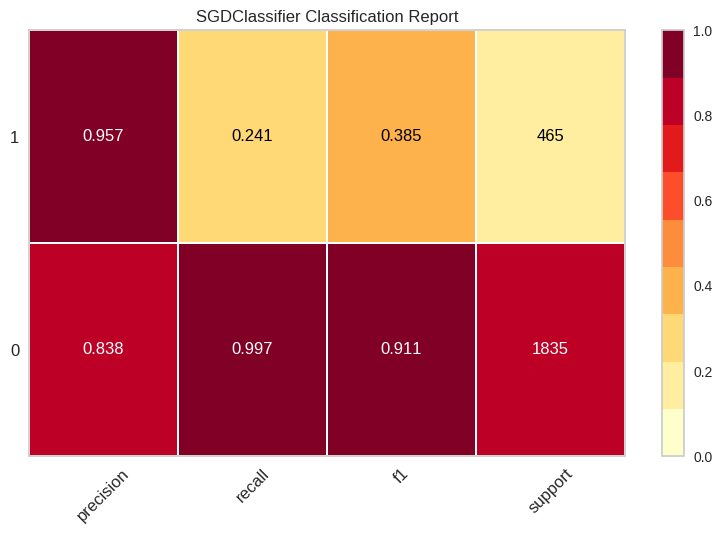

Train runtime: 3.853407859802246
Test runtime: 0.1870732307434082


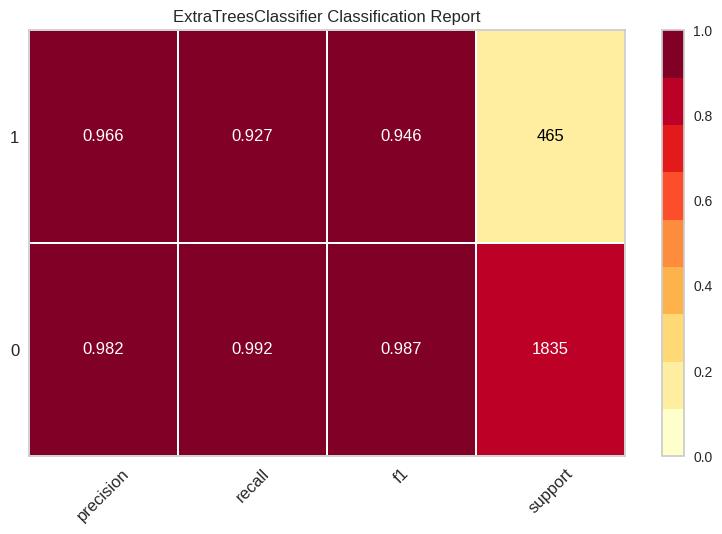

Train runtime: 0.9428350925445557
Test runtime: 1.093928575515747


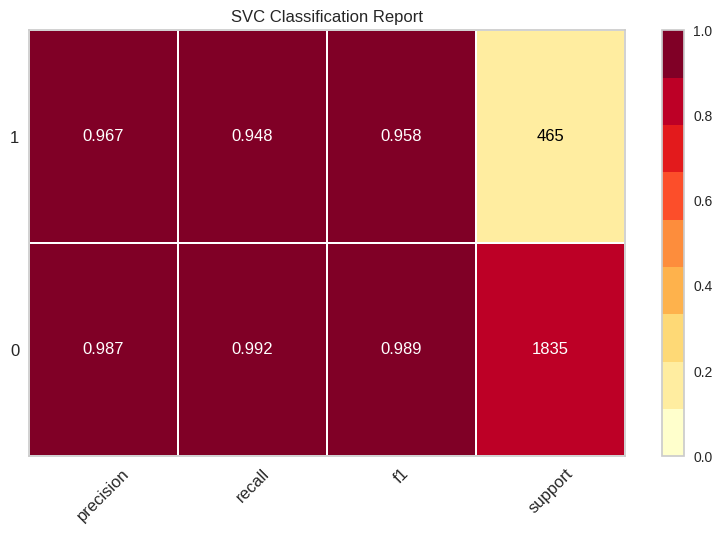

Train runtime: 78.89973068237305
Test runtime: 0.5021800994873047


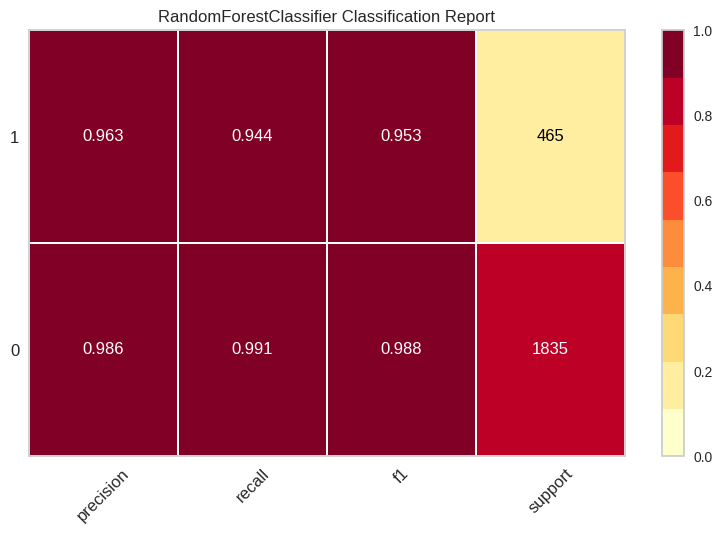

Train runtime: 104.71661138534546
Test runtime: 0.07256174087524414


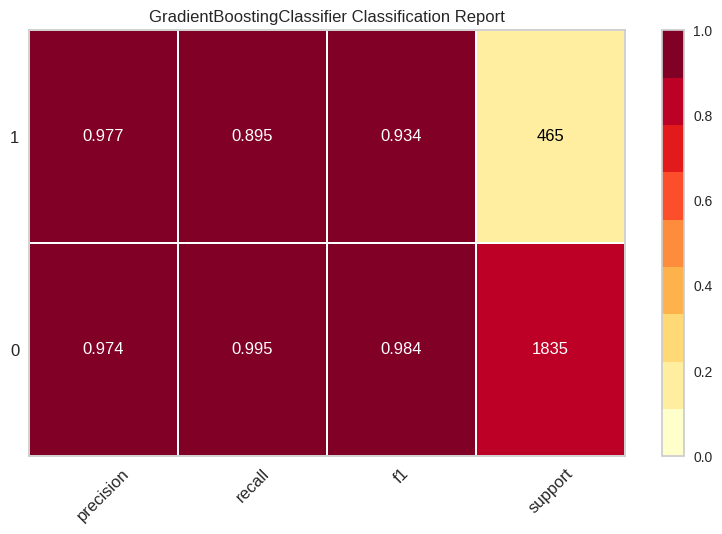

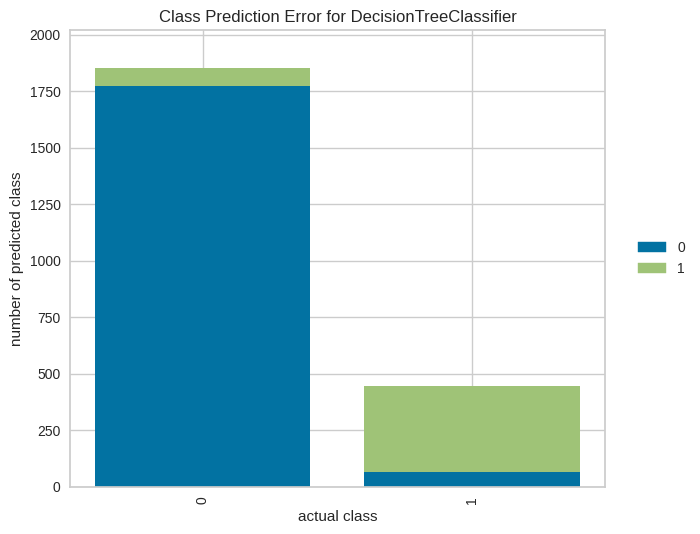

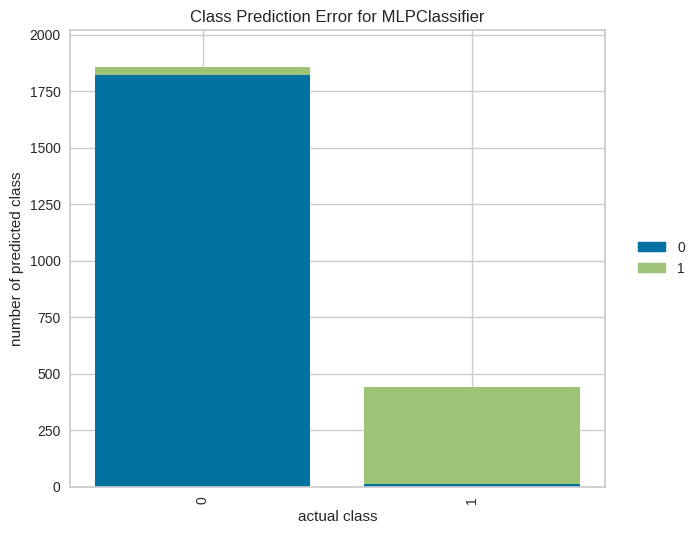

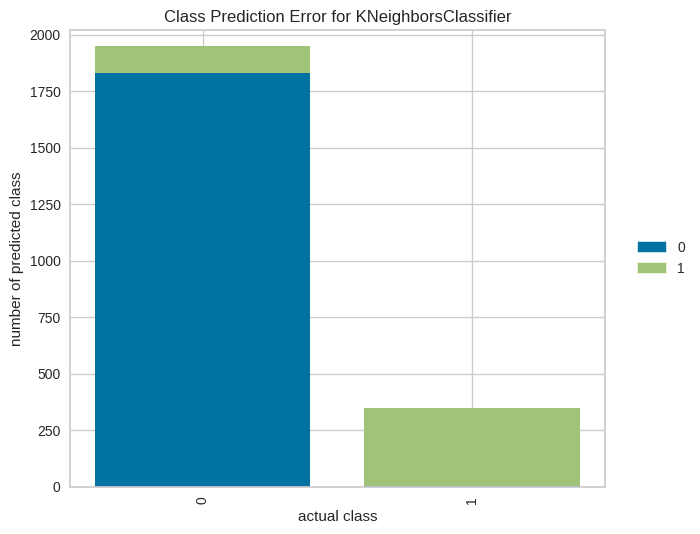

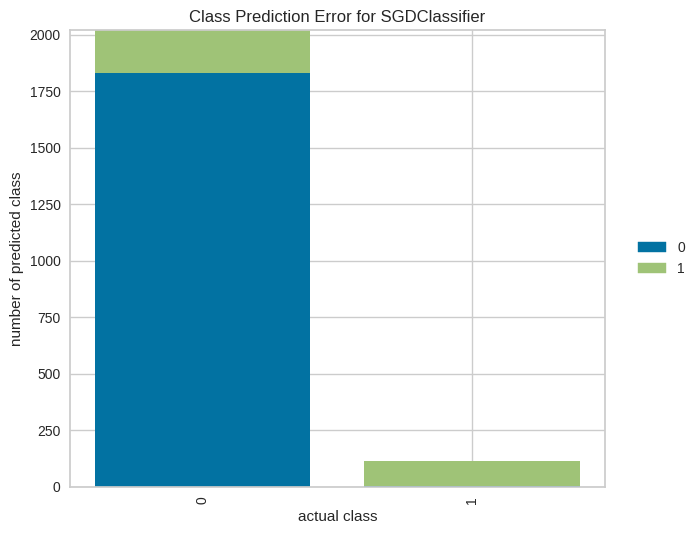

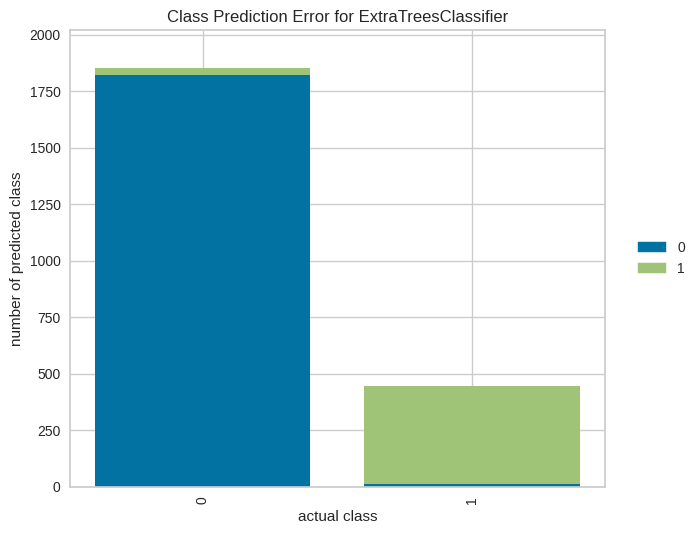

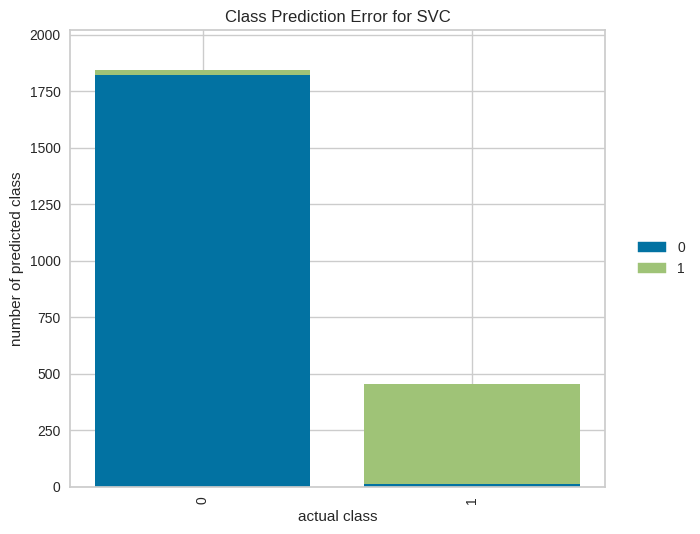

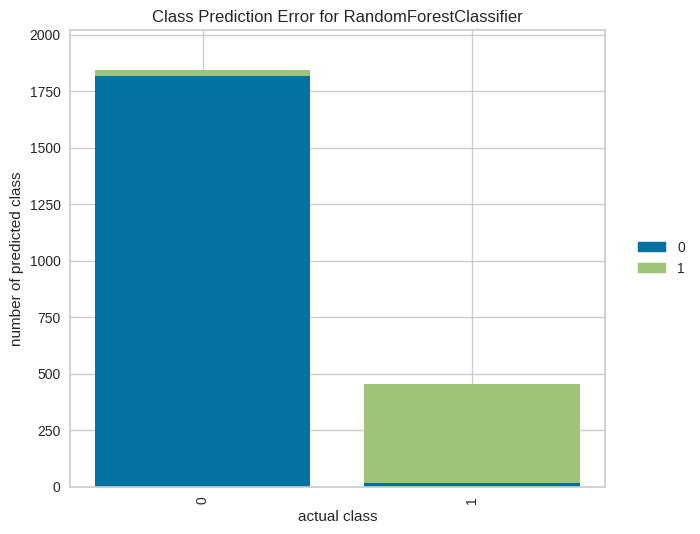

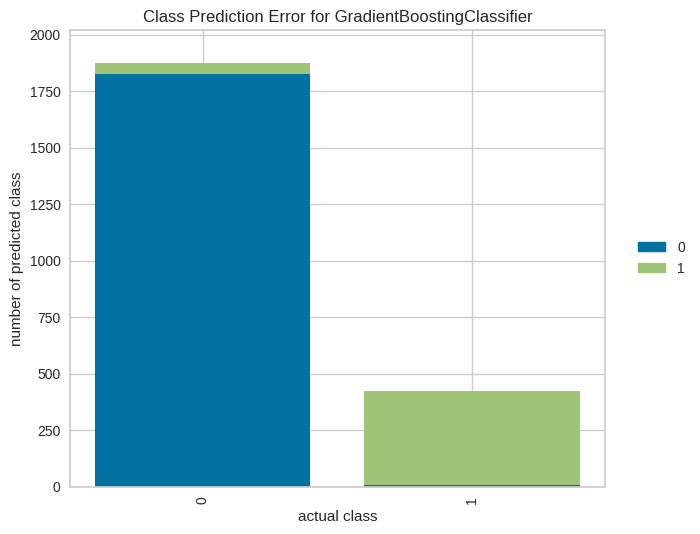

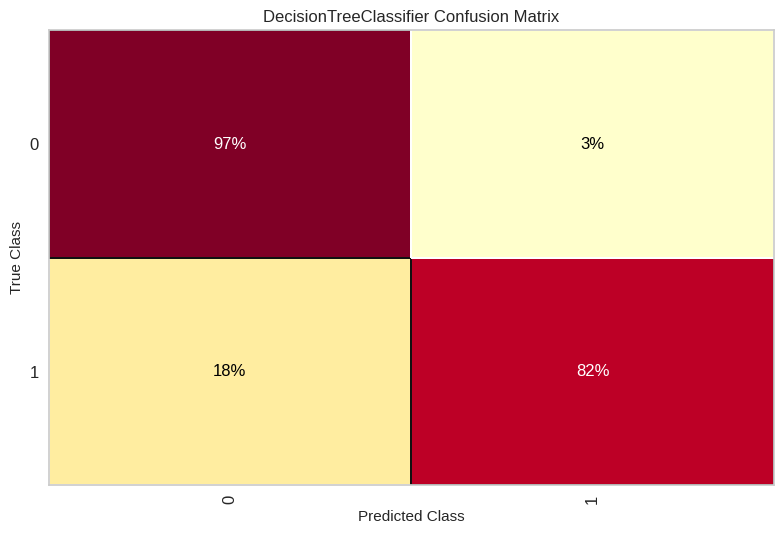

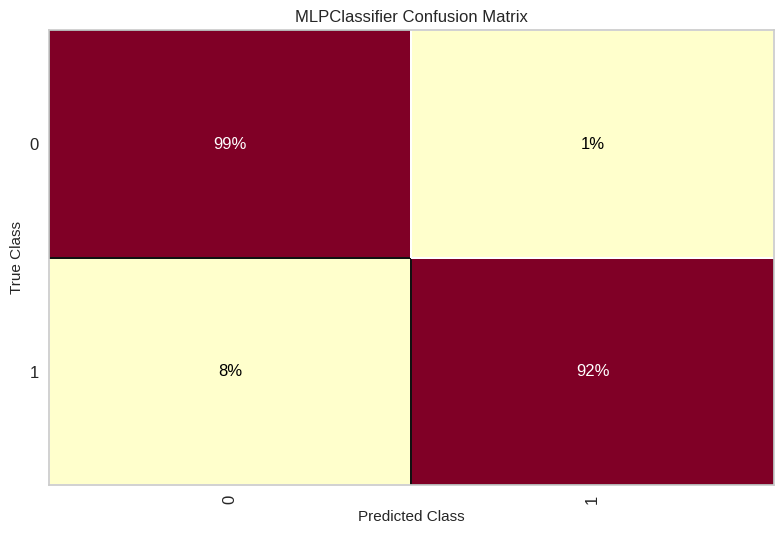

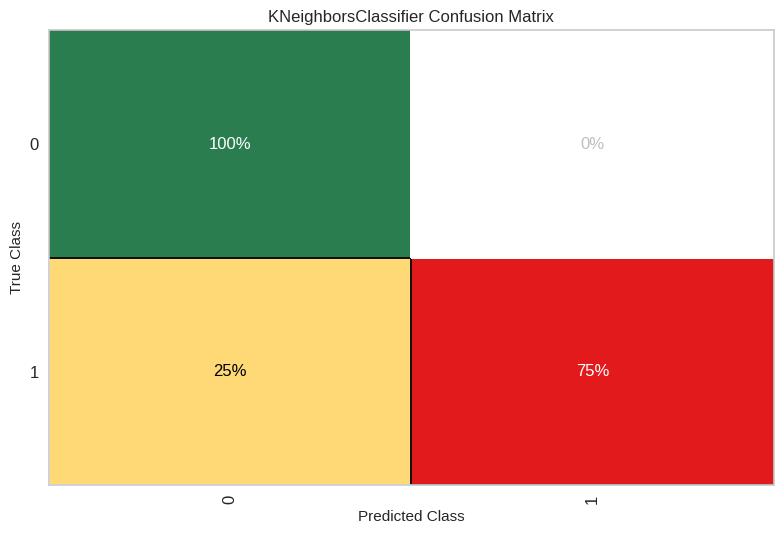

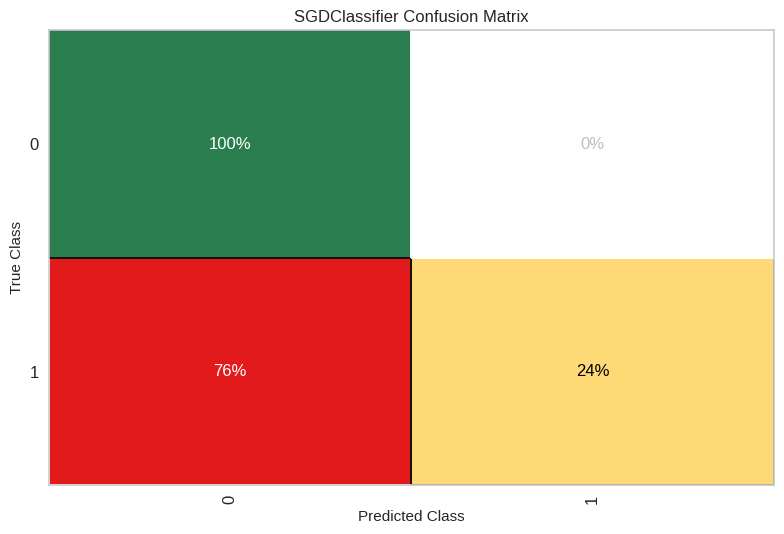

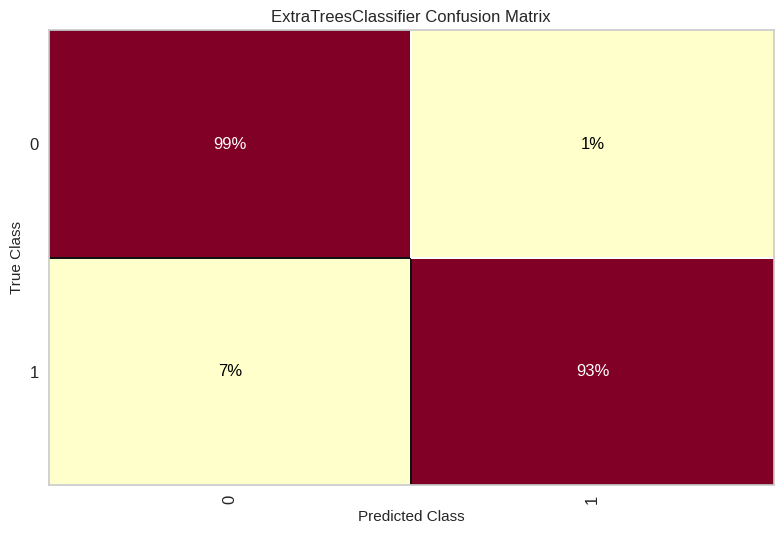

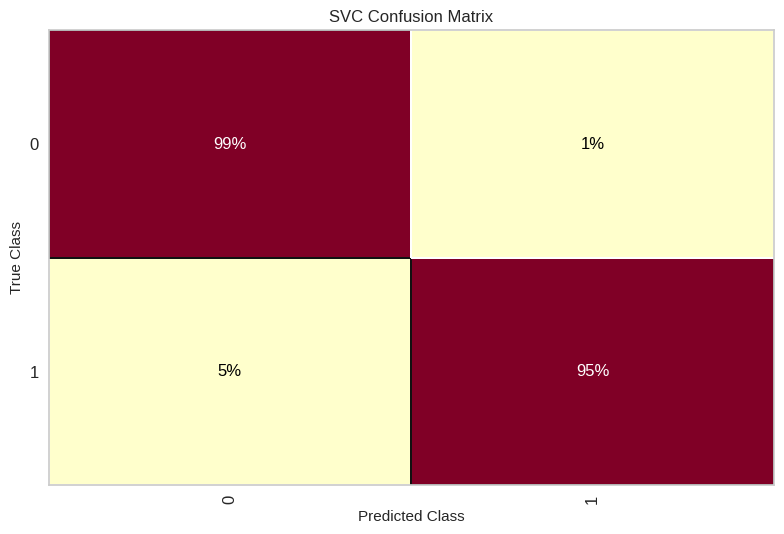

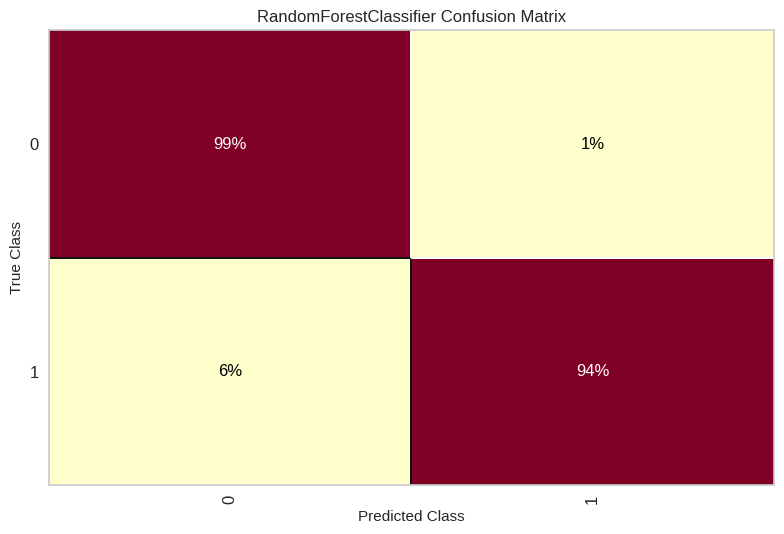

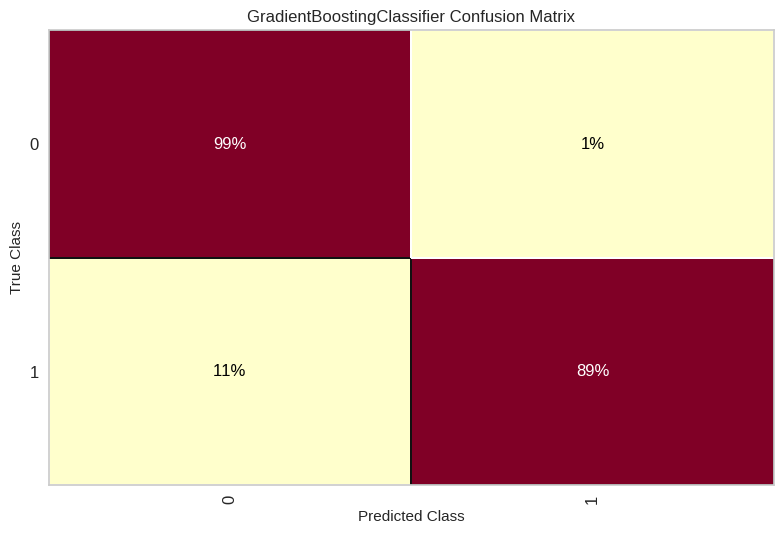

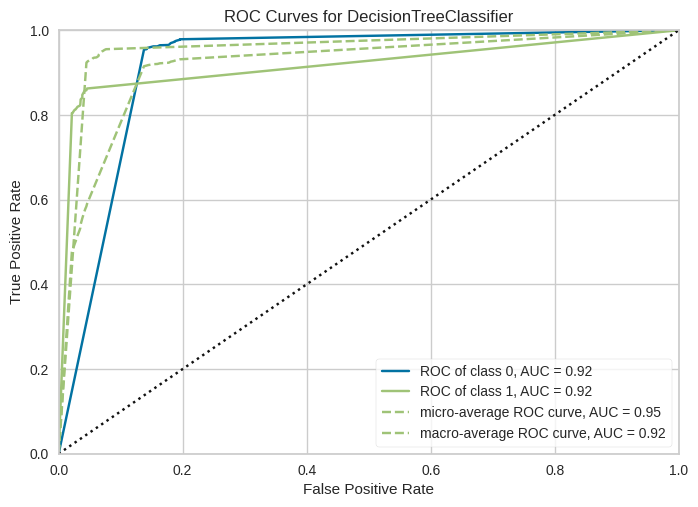

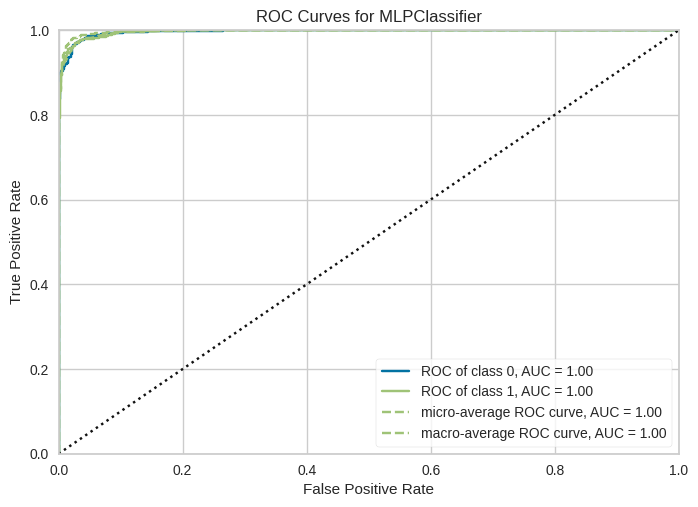

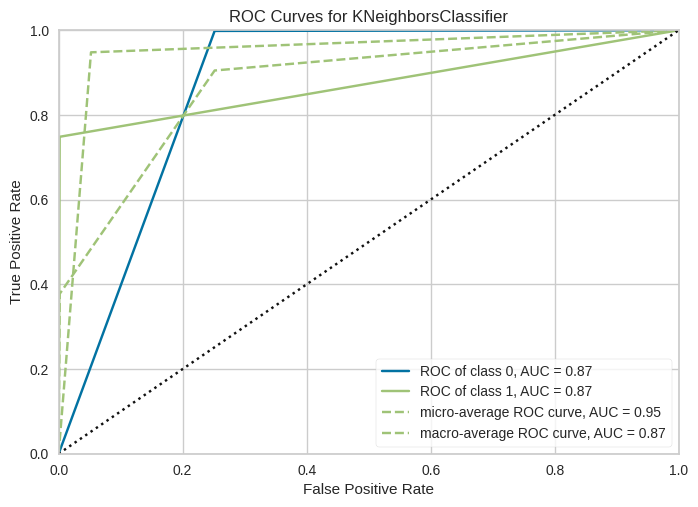

ModelError: ignored

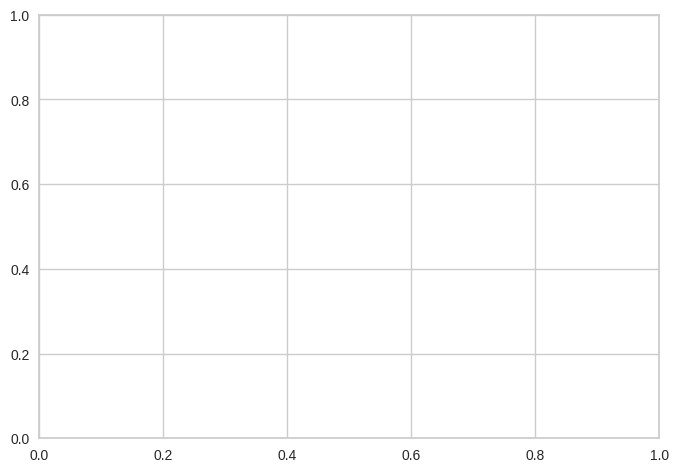

In [ ]:
#deploy visualization A
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz()]

In [ ]:
#Deploy aggregate metrics
classifier_metrics()

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10)
accuracy_score: 0.9409
cohen_kappa_score: 0.8134
log_loss: 1.5125
zero_one_loss: 0.0591
hemming_loss: 0.0591
matthews_corrcoef: 0.8138

---------------------------------------------------------------------------------
MLPClassifier(activation='logistic')
accuracy_score: 0.9813
cohen_kappa_score: 0.9411
log_loss: 0.0566
zero_one_loss: 0.0187
hemming_loss: 0.0187
matthews_corrcoef: 0.9414

---------------------------------------------------------------------------------
KNeighborsClassifier(leaf_size=1, n_neighbors=1)
accuracy_score: 0.9478
cohen_kappa_score: 0.8220
log_loss: 1.8805
zero_one_loss: 0.0522
hemming_loss: 0.0522
matthews_corrcoef: 0.8340

---------------------------------------------------------------------------------
SGDClassifier(alpha=0.001, max_iter=2000)
accuracy_score: 0.8387
cohen_kappa_score: 0.2927
log_loss: 0.0000
zero_one_loss: 0.1613
hemming_loss: 0.1613
